In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
#import missingno as msno #https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj
import missingno as msno
from scipy import stats

In [2]:
#filepath

#Class
#df = pd.read_csv("C:/Users/GBTC440003ur/Desktop/dc-residential-properties/DC_Properties.csv")

#Work
df = pd.read_csv("C:/Users/jholmes/Documents/Data Analytics Class/DC_Properties.csv")

C:\Users\jholmes\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#create small data set of interesting variables
mydf=df.copy()
mydf=df[['BATHRM','BEDRM','AYB', 'PRICE', 'WARD', 'LANDAREA', 'USECODE']]
mydf.head()
len(mydf.index)

158957

In [4]:
#check for missingness is small dataset
print(mydf.isnull().sum())

BATHRM          0
BEDRM           0
AYB           271
PRICE       60741
WARD            1
LANDAREA        0
USECODE         0
dtype: int64


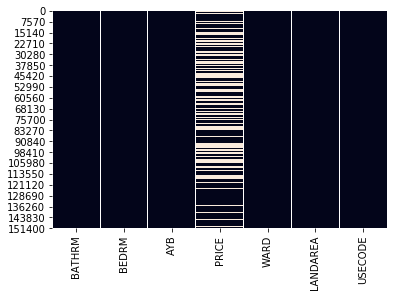

In [5]:
#visualize missingness
#plt.figure(figsize=(16,10))
sns.heatmap(mydf.isnull(), cbar=False)

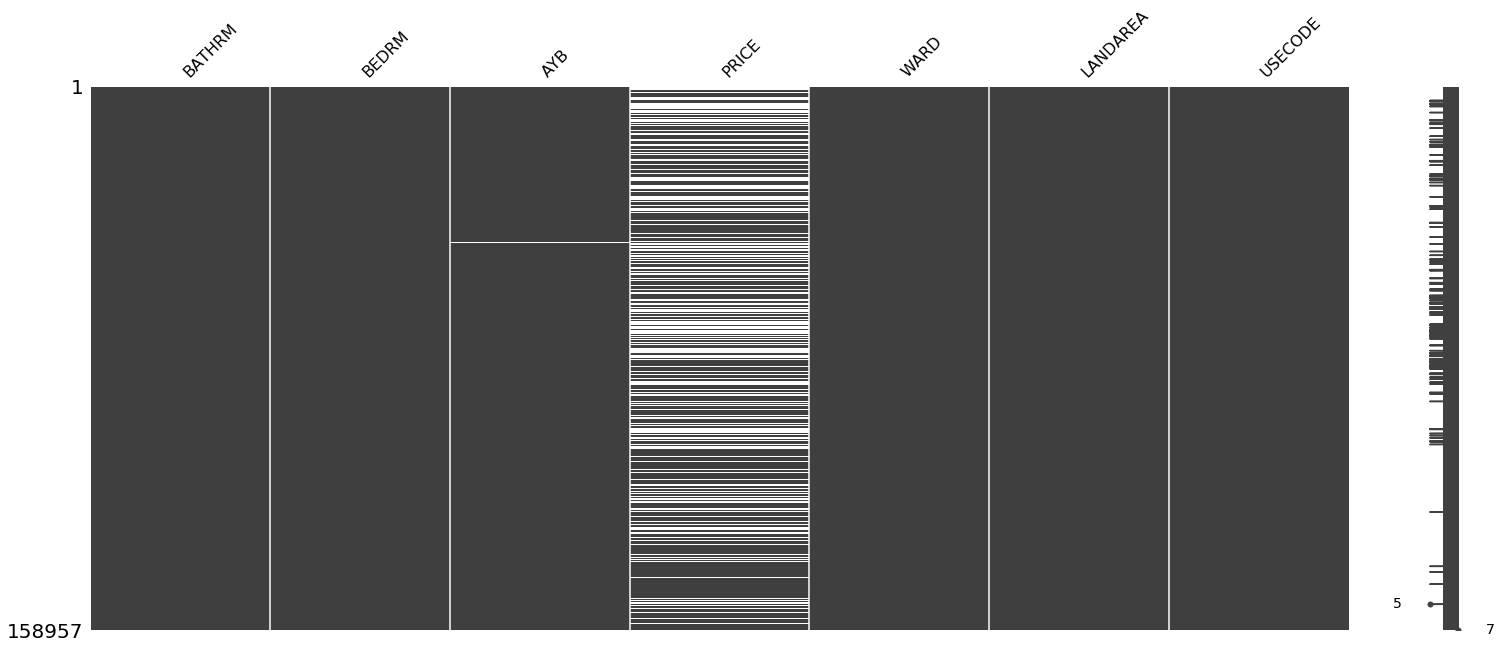

In [6]:
#visualize missingness
msno.matrix(mydf)

In [7]:
#make complete case df, mydf
mydf_cc=mydf.dropna()
len(mydf_cc.index)
mydf_cc.head()



,BATHRM,BEDRM,AYB,PRICE,WARD,LANDAREA,USECODE
0,4,4,1910.0,1095000.0,Ward 2,1680,24
2,3,5,1910.0,2100000.0,Ward 2,1680,24
3,3,5,1900.0,1602000.0,Ward 2,1680,24
5,3,5,1913.0,1950000.0,Ward 2,2196,11
7,3,4,1906.0,1050000.0,Ward 2,1627,24


In [8]:
#sortmydf_cc
mydf_cc.sort_values(by=['WARD'])

,BATHRM,BEDRM,AYB,PRICE,WARD,LANDAREA,USECODE
58804,2,4,1878.0,1750000.0,Ward 1,8460,24
138245,2,2,1908.0,715000.0,Ward 1,599,16
138244,2,2,1908.0,475000.0,Ward 1,601,16
138243,2,2,2012.0,756000.0,Ward 1,641,16
138242,2,2,2012.0,729000.0,Ward 1,641,16
...,...,...,...,...,...,...,...
102601,1,2,1952.0,180000.0,Ward 8,2568,13
102600,1,2,1952.0,259900.0,Ward 8,2602,13
102599,1,2,1952.0,275000.0,Ward 8,2595,13
103201,2,3,1936.0,104500.0,Ward 8,5679,12


In [9]:
variables = ['BATHRM','BEDRM','AYB', 'PRICE', 'WARD', 'LANDAREA', 'USECODE']

In [10]:
for var in variables:
    print(var)
    print(df[var].describe())
    print("~~~")

BATHRM
count    158957.000000
mean          1.810678
std           0.976396
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          14.000000
Name: BATHRM, dtype: float64
~~~
BEDRM
count    158957.000000
mean          2.732506
std           1.358864
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          24.000000
Name: BEDRM, dtype: float64
~~~
AYB
count    158686.000000
mean       1941.987579
std          33.640234
min        1754.000000
25%        1918.000000
50%        1937.000000
75%        1960.000000
max        2019.000000
Name: AYB, dtype: float64
~~~
PRICE
count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64
~~~
WARD
count     158956
unique         8
top       Ward 6
freq       23973
Name: WARD, dtype: object
~~~
LANDAREA
count    1

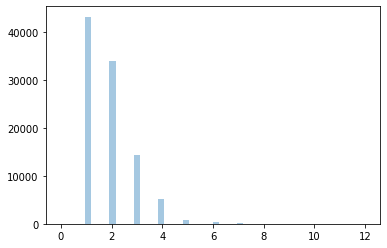

In [11]:
#distplot bathroom
distbathroom = mydf_cc[["BATHRM"]]
sns.distplot(distbathroom, kde = False, rug= False)

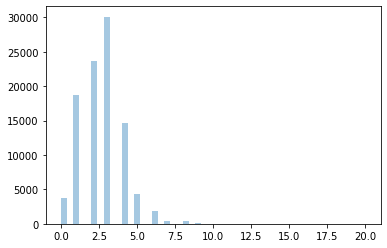

In [12]:
#distplot bedroom
distbedrm = mydf_cc[["BEDRM"]]
sns.distplot(distbedrm, kde = False, rug= False)

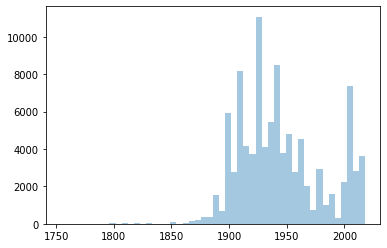

In [13]:
#distplot AYB
distayb = mydf_cc[["AYB"]]
sns.distplot(distayb, kde = False, rug= False)

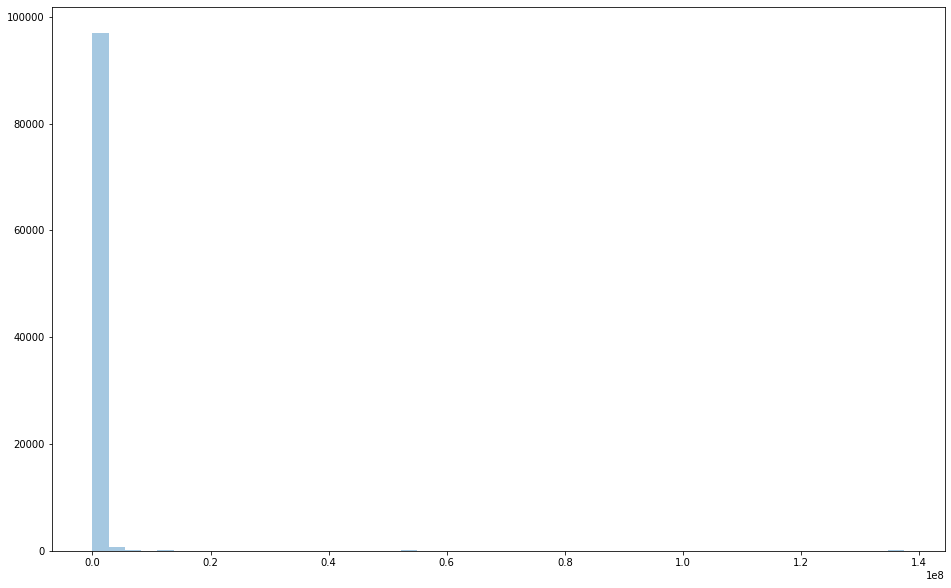

In [14]:
#distplot PRICE
plt.figure(figsize=(16,10))
distprice = mydf_cc[["PRICE"]]
sns.distplot(distprice, kde = False, rug= False)

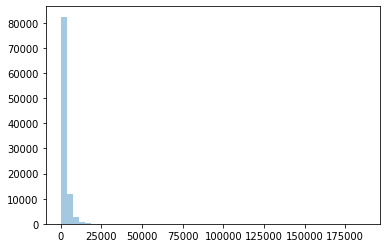

In [15]:
#distplot LANDAREA
distarea= mydf_cc[["LANDAREA"]]
sns.distplot(distarea, kde = False, rug= False)

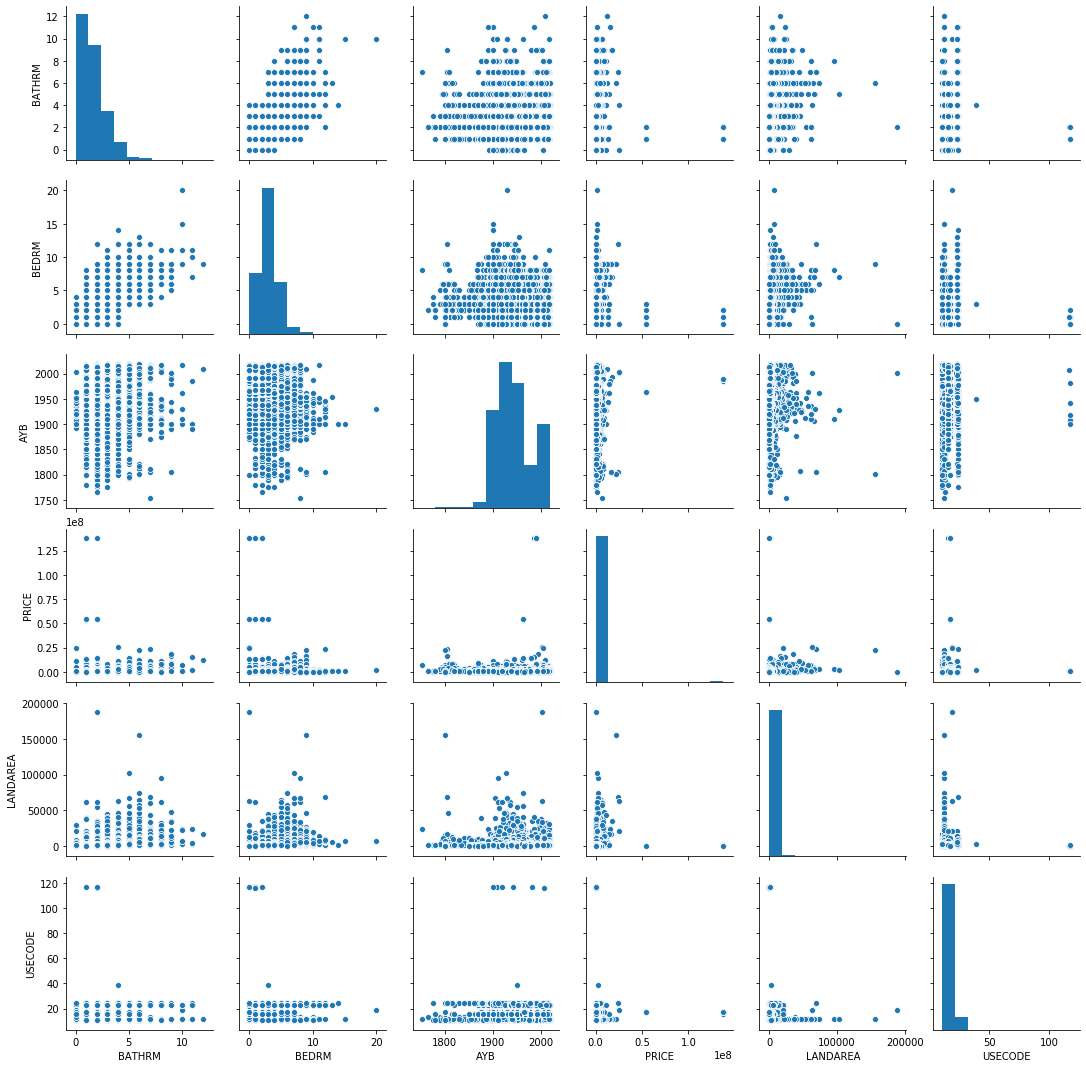

In [16]:
sns.pairplot(mydf_cc)
plt.show()

In [17]:
#create percentile cut points
pct5 =  mydf_cc['PRICE'].quantile(.05)
pct10 = mydf_cc['PRICE'].quantile(.10)
q1 = mydf_cc['PRICE'].quantile(.25)
q3 = mydf_cc['PRICE'].quantile(.75)
pct90 = mydf_cc['PRICE'].quantile(.90)
pct95 = mydf_cc['PRICE'].quantile(.95)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5

In [18]:
#create 5th percentile of price df
pricedf = mydf_cc.copy()
pct5df = pricedf.loc[pricedf['PRICE'] <= pct5]
len(pct5df.index)
#sortpct5df_cc
pct5df.sort_values(by=['WARD'])

,BATHRM,BEDRM,AYB,PRICE,WARD,LANDAREA,USECODE
49217,2,3,1912.0,32000.0,Ward 1,1000,11
52970,2,4,1911.0,80546.0,Ward 1,2550,11
52975,1,3,1915.0,90000.0,Ward 1,1700,11
52994,1,2,1913.0,68000.0,Ward 1,956,11
53015,1,3,1921.0,80875.0,Ward 1,1544,11
...,...,...,...,...,...,...,...
107619,1,1,1949.0,49000.0,Ward 8,2461,16
107614,1,1,1949.0,3523.0,Ward 8,1686,16
107612,1,1,1949.0,80000.0,Ward 8,1271,16
107608,1,3,1949.0,14900.0,Ward 8,2561,16


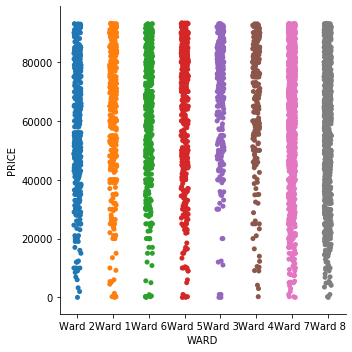

In [19]:
sns.catplot(x="WARD", y="PRICE", data=pct5df)
plt.show()

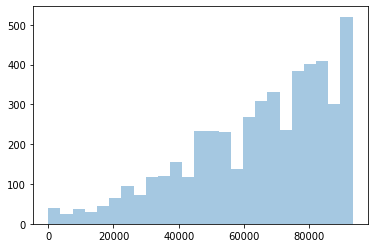

In [20]:
#distplot 5th percentile PRICE

distprice5 = pct5df[["PRICE"]]
sns.distplot(distprice5, kde = False, rug= False)

In [21]:
#create 95th percentile price df

pricedf = mydf_cc.copy()
pct95df = pricedf.loc[pricedf['PRICE'] <= pct95]
len(pct95df.index)
#sortmydf_cc
pct95df.sort_values(by=['WARD'])

,BATHRM,BEDRM,AYB,PRICE,WARD,LANDAREA,USECODE
139070,2,2,2005.0,759277.0,Ward 1,913,16
39921,4,5,1912.0,935000.0,Ward 1,1558,11
39920,3,4,1912.0,770000.0,Ward 1,1421,11
39918,2,4,1912.0,1213000.0,Ward 1,1800,24
39915,1,3,1912.0,1082000.0,Ward 1,1800,11
...,...,...,...,...,...,...,...
102512,2,3,1997.0,390000.0,Ward 8,3512,13
102511,2,3,1997.0,120000.0,Ward 8,3798,13
102510,2,3,1997.0,244000.0,Ward 8,4027,12
102523,3,4,1905.0,114000.0,Ward 8,3750,12


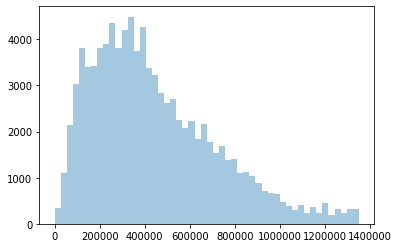

In [22]:
#distplot 95th percentile PRICE

distprice95 = pct95df[["PRICE"]]
sns.distplot(distprice95, kde = False, rug= False)

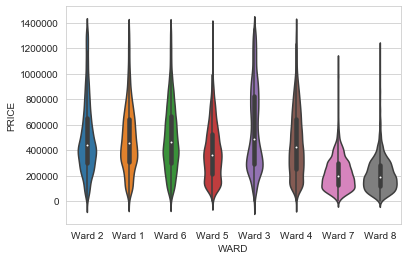

In [23]:
#violin plot 95th percentile
sns.set_style('whitegrid')
sns.violinplot(x='WARD',y = 'PRICE', data=pct95df)

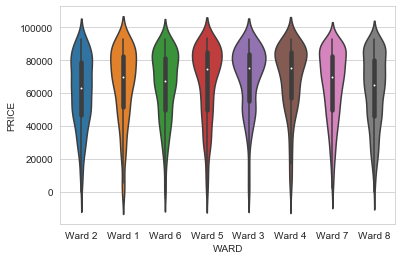

In [24]:
#violin plot 5th percentile price
sns.set_style('whitegrid')
sns.violinplot(x='WARD',y = 'PRICE', data=pct5df)

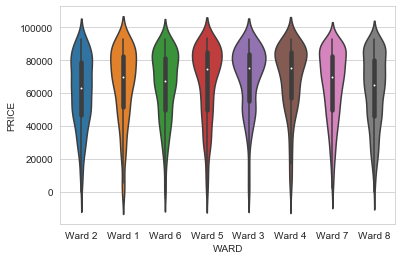

In [25]:
#violin plot 5th percentile price
sns.set_style('whitegrid')
sns.violinplot(x='WARD',y = 'PRICE', data=pct5df)

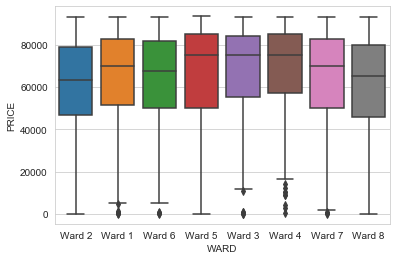

In [26]:
#box plot 5th percentile price
sns.set_style('whitegrid')
sns.boxplot(x='WARD',y = 'PRICE', data=pct5df)

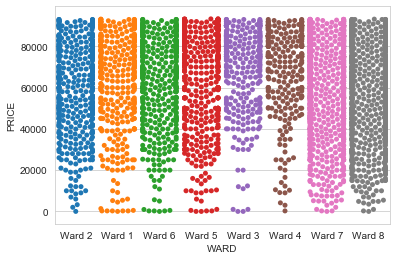

In [27]:
sns.swarmplot(x='WARD', y = 'PRICE', data=pct5df)

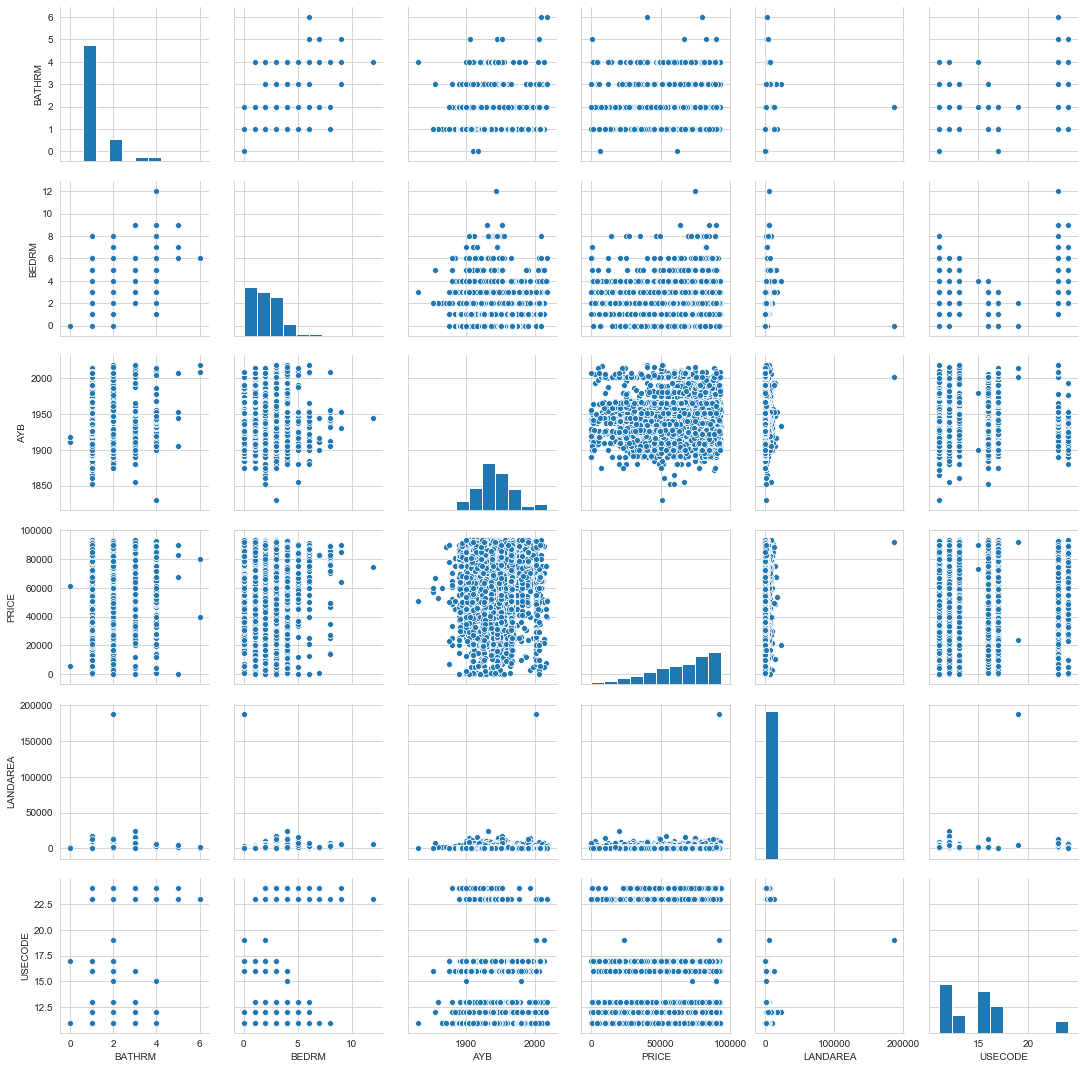

In [28]:
# Histogram 5th percentile
sns.pairplot(pct5df, diag_kind="hist")

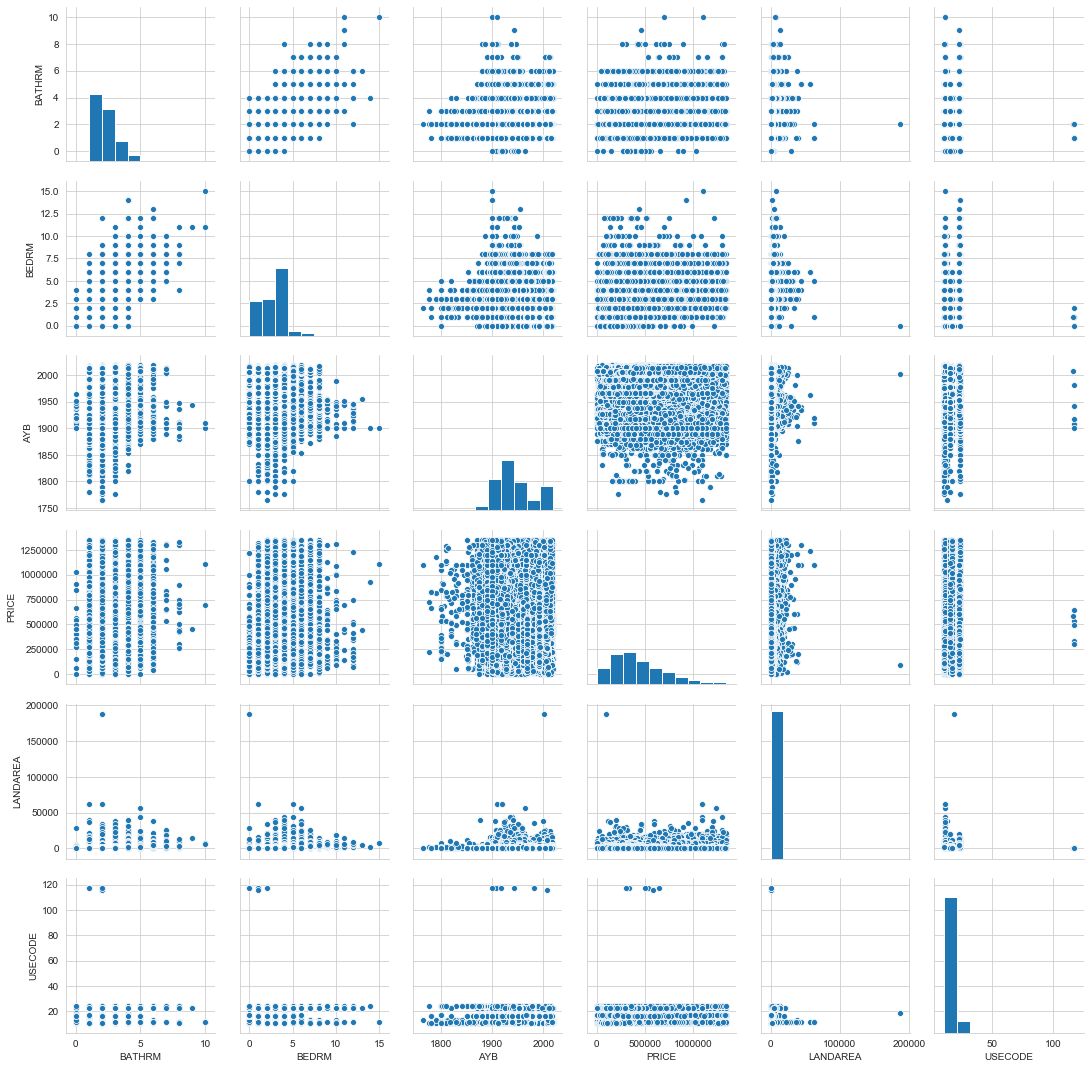

In [29]:
# Histogram 95th percentile
sns.pairplot(pct95df, diag_kind="hist")

In [30]:
#descriptives for 5th percentile
for var in variables:
    print(var)
    print(pct5df[var].describe())
    print("~~~")

BATHRM
count    4906.000000
mean        1.301264
std         0.685176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: BATHRM, dtype: float64
~~~
BEDRM
count    4906.000000
mean        2.115165
std         1.268929
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: BEDRM, dtype: float64
~~~
AYB
count    4906.000000
mean     1942.724419
std        25.209829
min      1830.000000
25%      1925.000000
50%      1941.000000
75%      1958.000000
max      2018.000000
Name: AYB, dtype: float64
~~~
PRICE
count     4906.000000
mean     64295.165308
std      21708.342379
min          1.000000
25%      50000.000000
50%      69000.000000
75%      82241.750000
max      93354.000000
Name: PRICE, dtype: float64
~~~
WARD
count       4906
unique         8
top       Ward 7
freq        1329
Name: WARD, dtype: object
~~~
LANDAREA
count      4906.000000
mean       1702.961476
std        3

In [31]:
#descriptives for 95th percentile
for var in variables:
    print(var)
    print(pct95df[var].describe())
    print("~~~")

BATHRM
count    93298.000000
mean         1.785333
std          0.881700
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: BATHRM, dtype: float64
~~~
BEDRM
count    93298.000000
mean         2.535767
std          1.328912
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         15.000000
Name: BEDRM, dtype: float64
~~~
AYB
count    93298.000000
mean      1944.868089
std         35.868230
min       1765.000000
25%       1918.000000
50%       1938.000000
75%       1965.000000
max       2018.000000
Name: AYB, dtype: float64
~~~
PRICE
count    9.329800e+04
mean     4.424984e+05
std      2.774144e+05
min      1.000000e+00
25%      2.310000e+05
50%      3.850000e+05
75%      6.050000e+05
max      1.350000e+06
Name: PRICE, dtype: float64
~~~
WARD
count      93298
unique         8
top       Ward 6
freq       15909
Name: WARD, dtype: object
~~~
LANDAREA
count     93298.000000
mean       

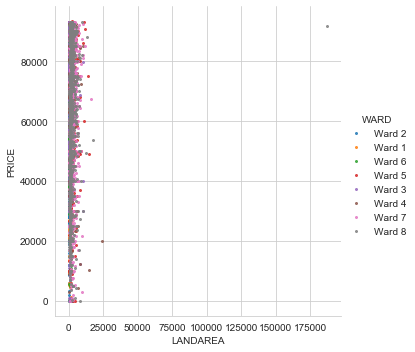

In [32]:
sns.lmplot( x="LANDAREA", y="PRICE", data=pct5df, scatter_kws={"s": 4},fit_reg=False, hue='WARD', legend=True) 

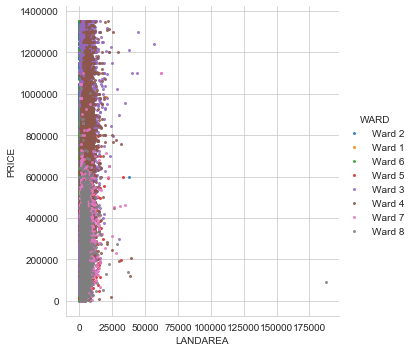

In [33]:
sns.lmplot( x="LANDAREA", y="PRICE", data=pct95df, scatter_kws={"s": 4},fit_reg=False, hue='WARD', legend=True)

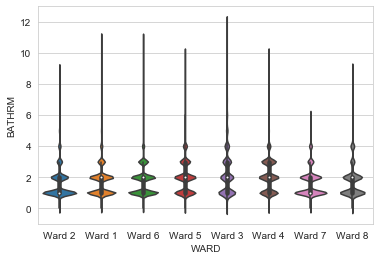

In [34]:
sns.violinplot(x='WARD', y='BATHRM', data=mydf_cc)

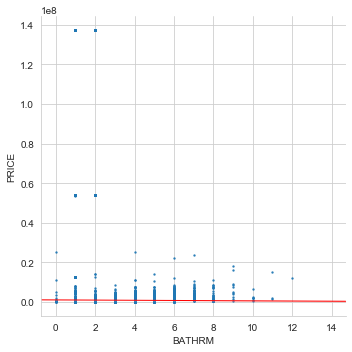

In [35]:
# of bathrooms vs. price
sns.lmplot(x='BATHRM', y='PRICE', data=mydf, scatter_kws={"s": 2},line_kws={"color":"r", "lw":1})

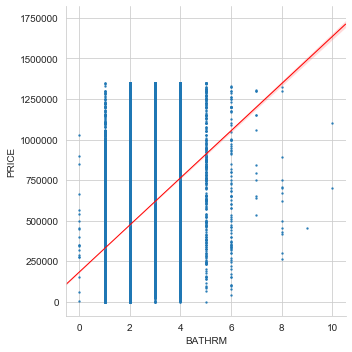

In [36]:
# of bathrooms vs. 95thpercentileprice 
sns.lmplot(x='BATHRM', y='PRICE', scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1}, data=pct95df)

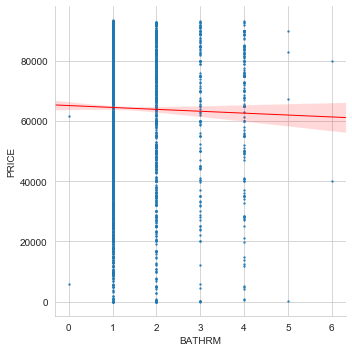

In [37]:
# of bathrooms vs. 5thpercentileprice 
sns.lmplot(x='BATHRM', y='PRICE', data=pct5df, scatter_kws={"s": 2},line_kws={"color":"r", "lw":1})

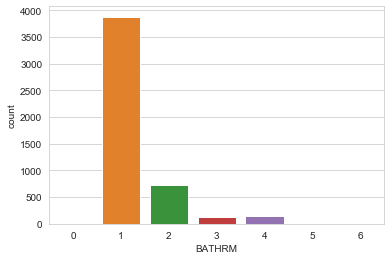

In [38]:
#bathrooms vs. 5thpercentile price bar
sns.countplot(x='BATHRM', data=pct5df)

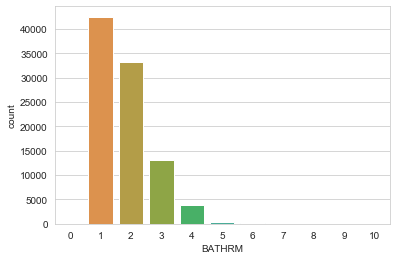

In [39]:
#bathrooms vs. 95thpercentile price bar
sns.countplot(x='BATHRM', data=pct95df)

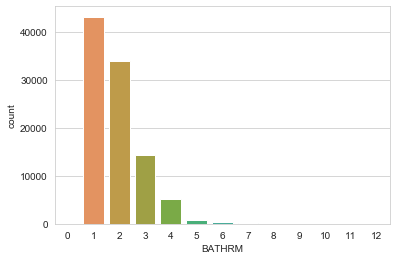

In [40]:
#bathrooms bar
sns.countplot(x='BATHRM', data=mydf_cc)

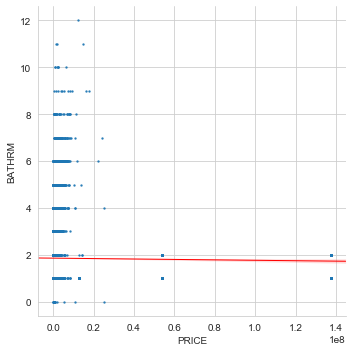

In [41]:
sns.lmplot(x='PRICE', y='BATHRM', data=mydf_cc, scatter_kws={"s": 2},line_kws={"color":"r", "lw":1})

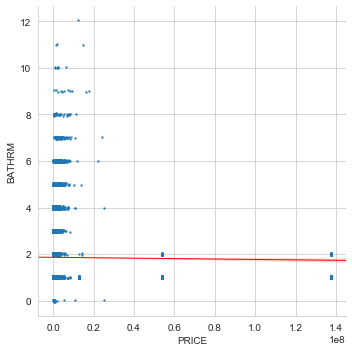

In [42]:
sns.lmplot(x='PRICE', y='BATHRM', data=mydf_cc, y_jitter=.05, scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1} )

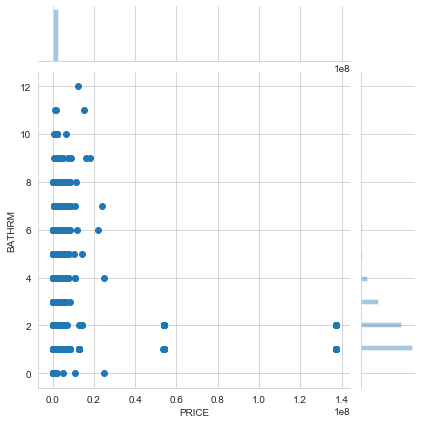

In [43]:
sns.jointplot(x=mydf_cc["PRICE"], y=mydf_cc["BATHRM"], kind='scatter')

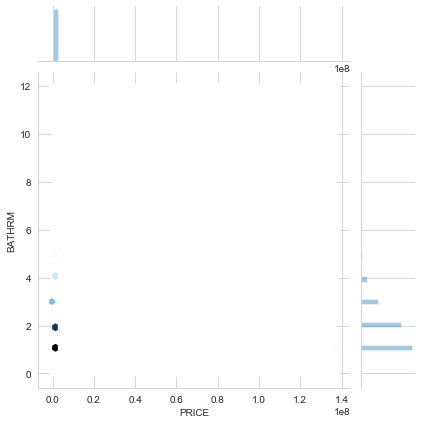

In [44]:
sns.jointplot(x=mydf_cc["PRICE"], y=mydf_cc["BATHRM"], kind='hex')

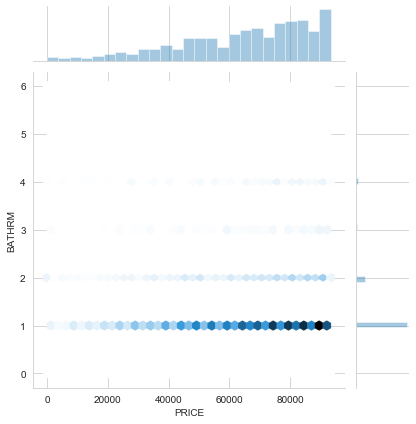

In [45]:
sns.jointplot(x=pct5df["PRICE"], y=pct5df["BATHRM"], kind='hex')

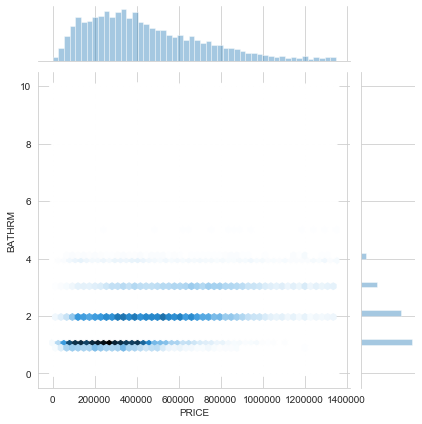

In [46]:
sns.jointplot(x=pct95df["PRICE"], y=pct95df["BATHRM"], kind='hex')


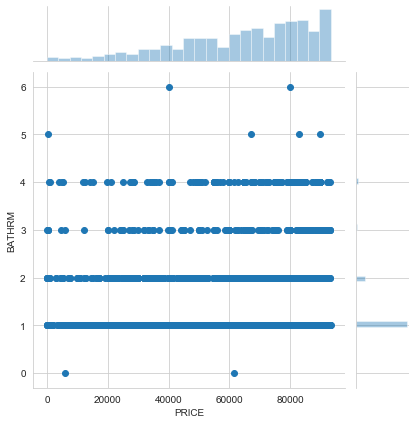

In [47]:
sns.jointplot(x=pct5df["PRICE"], y=pct5df["BATHRM"], kind='scatter')

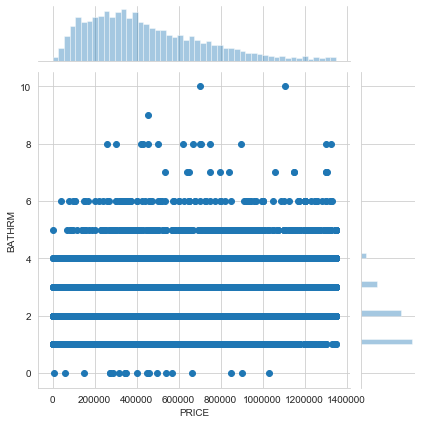

In [48]:
sns.jointplot(x=pct95df["PRICE"], y=pct95df["BATHRM"], kind='scatter')

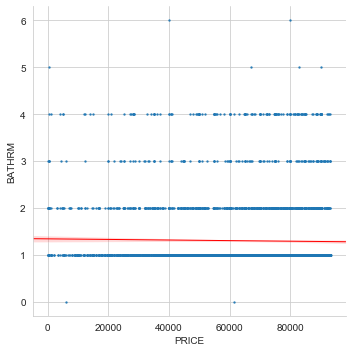

In [49]:
sns.lmplot(x='PRICE', y='BATHRM', data=pct5df, scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1})

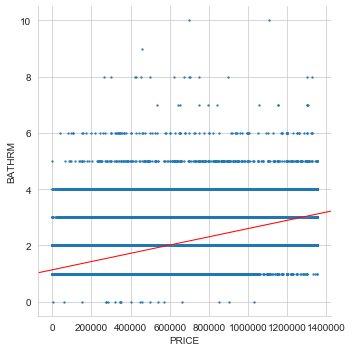

In [50]:
sns.lmplot(x='PRICE', y='BATHRM', data=pct95df, scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1})

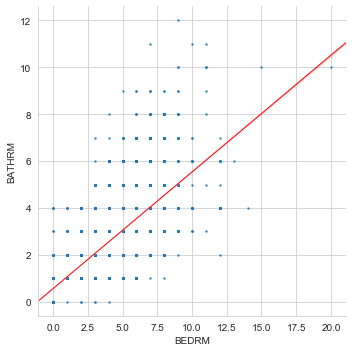

In [51]:
#bedrooms vs. bathrooms all prices
sns.lmplot(x='BEDRM', y='BATHRM', data=mydf_cc, scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1})

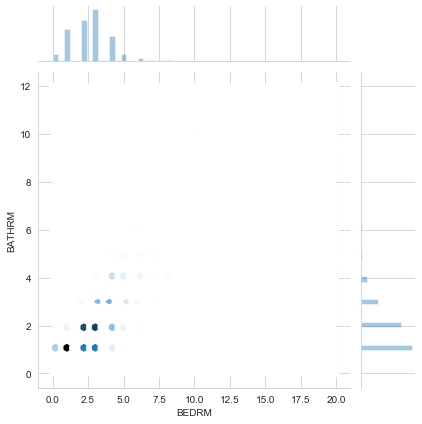

In [52]:
sns.jointplot(x=mydf_cc["BEDRM"], y=mydf_cc["BATHRM"], kind='hex')

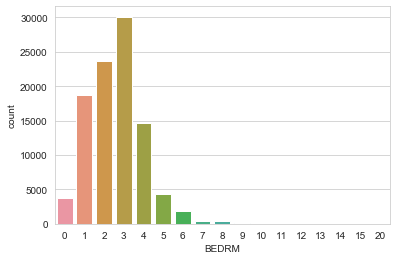

In [53]:
#bedrooms bar
sns.countplot(x='BEDRM', data=mydf_cc)

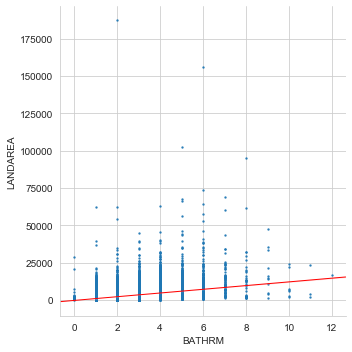

In [54]:
#bathrooms vs. landarea all prices
sns.lmplot(x='BATHRM', y='LANDAREA', data=mydf_cc, scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1})

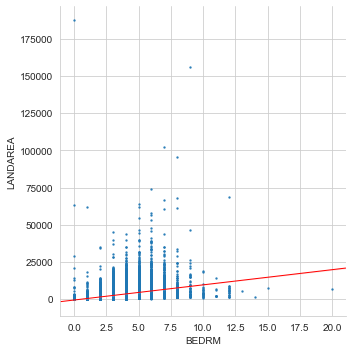

In [55]:
#bedrooms vs. landarea all prices
sns.lmplot(x='BEDRM', y='LANDAREA', data=mydf_cc, scatter_kws={"s": 2}, line_kws={"color":"r", "lw":1})